# Business Understanding

The United States constitution had made mandatory the decennial census.   The census provided a headcount which did not provide enough details to make data driven decisions about the use of government funds.  A long form with necessary details was introduced in the 20th century.   Only one in six households received the additional questions on the long form.  In the 21st century, the American Community Survey (ACS) was established to conduct ongoing surveys with the details previously included on the decennial long form census.   The ACS survey results provide data to determine the appropriate distribution of more than $400 billion in federal and state funds.  The funds are for social programs as well as physical and service infrastructure.  

Annually 3.5 million homes are surveyed.   A random sample was performed on both the housing data as well as the personal data to allow for manageable data sets while including a macro vision of the data.  We will consider the data the training sets.
The validation of the data can be done in several ways.  A statistically sound method would be to validate the data using another random sampling which would be the test set.   Another potential option would be the validate the federal spending.  Due to the difficulty in finding the specifics spending details, the spending validation model would be prohibited by the time constraints as well as data availability constraints. 

Source:  https://www.census.gov/programs-surveys/acs/


# Data Description

The focus of the exploratory data analysis is the personal data.  The personal data contains 283 attributes.  The data dictionary link below provides the description of the attributes.  

Data Dictionary:  https://www2.census.gov/programs-surveys/acs/tech_docs/pums/data_dict/PUMSDataDict13.txt





In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Polygon, PathPatch
from matplotlib.collections import PatchCollection
from mpl_toolkits.basemap import Basemap

os.chdir('/Users/ed/')

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, axisbg='w', frame_on=False)
fig.suptitle('PUMA Shapefiles: An Example with Basemap', fontsize=20)


C:\Users\ed\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:

# create a map object with the Albert Equal Areas projection.
# This projection tends to look nice for the contiguous us.
m = Basemap(width=5000000,height=3500000,
            resolution='l',projection='aea',\
            lat_1=30.,lat_2=50,lon_0=-96,lat_0=38)
            
# state codes from http://www2.census.gov/programs-surveys/acs/tech_docs/pums/data_dict/PUMSDataDict13.txt
# note that areas outside of the conus have been commented out
state_codes = {
    '01': 'Alabama',
    '02': 'Alaska',
    '04': 'Arizona',
    '05': 'Arkansas',
    '06': 'California',
    '08': 'Colorado',
    '09': 'Connecticut',
    '10': 'Delaware',
    '11': 'District of Columbia',
    '12': 'Florida',
    '13': 'Georgia',
    '15': 'Hawaii',
    '16': 'Idaho',
    '17': 'Illinois',
    '18': 'Indiana',
    '19': 'Iowa',
    '20': 'Kansas',
    '21': 'Kentucky',
    '22': 'Louisiana',
    '23': 'Maine',
    '24': 'Maryland',
    '25': 'Massachusetts',
    '26': 'Michigan',
    '27': 'Minnesota',
    '28': 'Mississippi',
    '29': 'Missouri',
    '30': 'Montana',
    '31': 'Nebraska',
    '32': 'Nevada',
    '33': 'New Hampshire',
    '34': 'New Jersey',
    '35': 'New Mexico',
    '36': 'New York',
    '37': 'North Carolina',
    '38': 'North Dakota',
    '39': 'Ohio',
    '40': 'Oklahoma',
    '41': 'Oregon',
    '42': 'Pennsylvania',
    '44': 'Rhode Island',
    '45': 'South Carolina',
    '46': 'South Dakota',
    '47': 'Tennessee',
    '48': 'Texas',
    '49': 'Utah',
    '50': 'Vermont',
    '51': 'Virginia',
    '53': 'Washington',
    '54': 'West Virginia',
    '55': 'Wisconsin',
    '56': 'Wyoming',
    '72': 'Puerto Rico'
}       



In [3]:
# define a colorramp
num_colors = 12
cm = plt.get_cmap('Blues')
blues = [cm(1.*i/num_colors) for i in range(num_colors)]


In [4]:
# add colorbar legend
cmap = mpl.colors.ListedColormap(blues)
# define the bins
bounds = np.linspace(0.0, 1.0, num_colors)


The original dataset contained approximately 3.1 million records. We quickly found that using the entire dataset would be much too arduous on our computers and would take too much time to gain meaningful information from the data.

Instead of using the massive, original dataset; we decided to take a subset of the dataset. The dataset we created includes 2.5% of the original observations (approximatly 78,000 rows). We recognize that there will be some loss in the interpretability of any statistical observations we make on this subset.  We counter this by taking groupings of appropriate levels within the features e.i. poverty by state.

In [7]:
df = pd.read_csv('/data/person/person-subset-2.5percent.csv')

## Poverty

In [8]:
df.POVPIP.describe()

count    75204.000000
mean       304.934019
std        165.949662
min          0.000000
25%        159.000000
50%        307.000000
75%        501.000000
max        501.000000
Name: POVPIP, dtype: float64

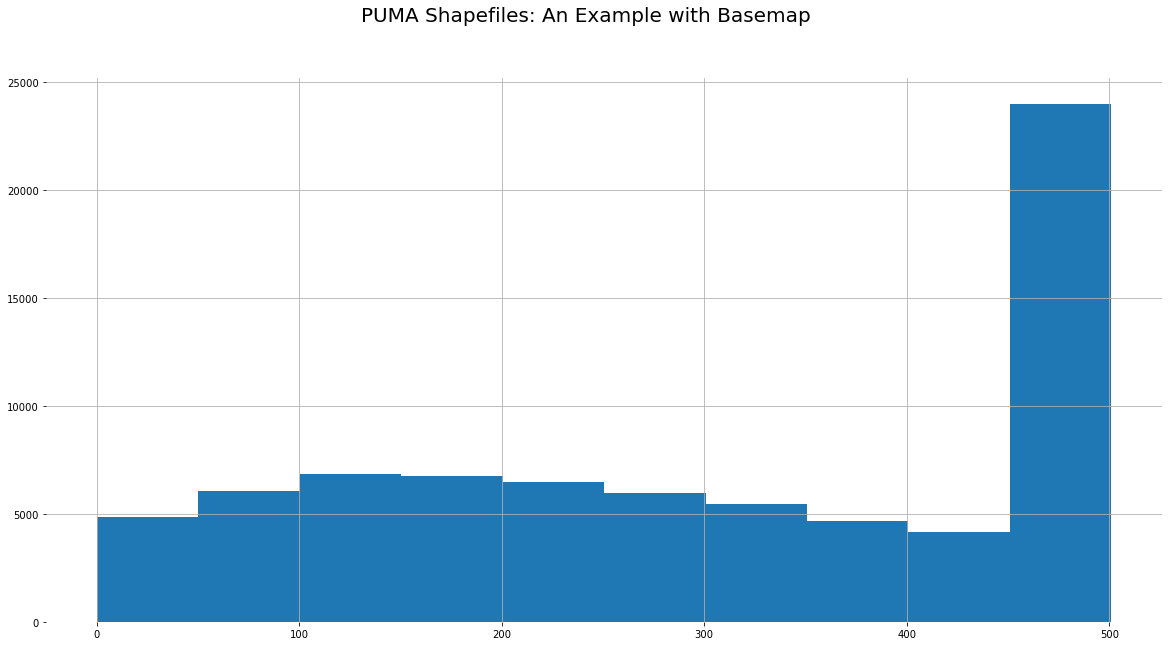

In [9]:
df.POVPIP.hist()
plt.show()

In [15]:
#grab PUMA
puma = df.groupby(['PUMA'])
puma.describe()


ADJINC         AGEP          ANC        ANC1P        ANC2P  \
PUMA                                                                         
100   count     1681.0  1681.000000  1681.000000  1681.000000  1681.000000   
      mean   1007549.0    42.096966     1.789411   461.508626   777.710291   
      std          0.0    23.931589     1.078318   437.287005   394.486986   
      min    1007549.0     0.000000     1.000000     3.000000     3.000000   
      25%    1007549.0    20.000000     1.000000    32.000000   918.000000   
      50%    1007549.0    44.000000     1.000000   210.000000   999.000000   
      75%    1007549.0    61.000000     2.000000   939.000000   999.000000   
      max    1007549.0    95.000000     4.000000   999.000000   999.000000   
101   count      450.0   450.000000   450.000000   450.000000   450.000000   
      mean   1007549.0    39.177778     1.731111   448.320000   732.331111   
      std          0.0    24.509067     1.001629   411.332020   416.265258   
      min    1007549.0     0.000000     1.000000     3.000000    22.000000   
      25%    1007549.0    19.000000     1.000000    50.000000   142.000000   
      50%    1007549.0    35.500000     1.000000   216.500000   999.000000   
      75%    1007549.0    59.000000     2.000000   919.500000   999.000000   
      max    1007549.0    94.000000     4.000000   999.000000   999.000000   
102   count      484.0   484.000000   484.000000   484.000000   484.000000   
      mean   1007549.0    42.570248     1.778926   412.475207   720.367769   
      std          0.0    23.961866     1.024892   414.161251   424.040738   
      min    1007549.0     0.000000     1.000000     3.000000    20.000000   
      25%    1007549.0    21.750000     1.000000    50.000000   142.000000   
      50%    1007549.0    45.000000     1.000000   174.000000   999.000000   
      75%    1007549.0    62.000000     2.000000   902.000000   999.000000   
      max    1007549.0    95.000000     4.000000   999.000000   999.000000   
103   count      387.0   387.000000   387.000000   387.000000   387.000000   
      mean   1007549.0    39.410853     1.692506   394.612403   740.472868   
      std          0.0    23.147179     0.984870   407.872599   413.406976   
      min    1007549.0     0.000000     1.000000    20.000000     3.000000   
      25%    1007549.0    19.500000     1.000000    50.000000   142.000000   
      50%    1007549.0    39.000000     1.000000   148.000000   999.000000   
...                ...          ...          ...          ...          ...   
59309 std          0.0    21.728246     1.014479   383.638670   405.992318   
      min    1007549.0     4.000000     1.000000    32.000000    11.000000   
      25%    1007549.0    16.500000     1.000000   153.000000   620.250000   
      50%    1007549.0    38.000000     1.000000   582.500000   999.000000   
      75%    1007549.0    49.500000     2.000000   819.750000   999.000000   
      max    1007549.0    80.000000     4.000000   999.000000   999.000000   
70101 count       21.0    21.000000    21.000000    21.000000    21.000000   
      mean   1007549.0    38.047619     1.476190   170.904762   558.904762   
      std          0.0    26.058542     0.511766   295.696957   473.949776   
      min    1007549.0     3.000000     1.000000    22.000000    26.000000   
      25%    1007549.0    11.000000     1.000000    32.000000    50.000000   
      50%    1007549.0    44.000000     1.000000    32.000000   999.000000   
      75%    1007549.0    63.000000     2.000000   142.000000   999.000000   
      max    1007549.0    77.000000     2.000000   939.000000   999.000000   
70201 count       31.0    31.000000    31.000000    31.000000    31.000000   
      mean   1007549.0    48.483871     1.967742   268.516129   669.064516   
      std          0.0    22.087509     1.110071   396.294997   452.884381   
      min    1007549.0    10.000000     1.000000    11.000000    22.000000   
      25%    1007549.0    28.500000   

In [21]:
puma.PINCP.mean().div(df.PINCP.max())


PUMA
100      0.030024
101      0.036064
102      0.044407
103      0.043538
104      0.039604
105      0.048456
106      0.039065
107      0.048331
108      0.056739
109      0.045320
110      0.057300
111      0.057741
112      0.090062
113      0.040798
114      0.042197
115      0.032006
116      0.043356
117      0.033989
118      0.025626
119      0.014165
120      0.052697
121      0.019172
122      0.008439
123      0.026259
124      0.025157
125      0.018585
126      0.047392
127      0.025779
128      0.039505
129      0.052657
           ...   
51186    0.041832
51206    0.044839
51215    0.045064
51224    0.041044
51225    0.058738
51235    0.031905
51244    0.058036
51245    0.070126
51246    0.044439
51255    0.093829
53001    0.028984
55001    0.030999
55002    0.041853
55101    0.025231
55102    0.023059
55103    0.020552
57001    0.036628
57002    0.039738
59301    0.055263
59302    0.067253
59303    0.055210
59304    0.043945
59305    0.064525
59306    0.063475
59307

In [13]:
# read each states shapefile
for key in state_codes.keys():
    m.readshapefile('data/shapefiles/tl_2013_{0}_puma10'.format(key),
                    name='state', drawbounds=True, default_encoding='latin-1')
                    
    # loop through each PUMA and assign a random color from our colorramp
    for info, shape in zip(m.state_info, m.state):
        patches = [Polygon(np.array(shape), True)]
        pc = PatchCollection(patches, edgecolor='k', linewidths=1., zorder=2)
        pc.set_color(random.choice(blues))
        ax.add_collection(pc)


ADJINC          AGEP           ANC         ANC1P  \
POVPIP                                                              
0.0    count     1420.0   1420.000000   1420.000000   1420.000000   
       mean   1007549.0     34.922535      1.723239    571.094366   
       std          0.0     20.626677      1.142501    398.980750   
       min    1007549.0      0.000000      1.000000      3.000000   
       25%    1007549.0     20.000000      1.000000    195.000000   
       50%    1007549.0     31.000000      1.000000    750.000000   
       75%    1007549.0     51.000000      2.000000    936.000000   
       max    1007549.0     94.000000      4.000000    999.000000   
1.0    count       51.0     51.000000     51.000000     51.000000   
       mean   1007549.0     28.960784      1.862745    581.235294   
       std          0.0     21.345689      1.166527    410.135421   
       min    1007549.0      0.000000      1.000000     20.000000   
       25%    1007549.0      9.500000      1.000000    152.000000   
       50%    1007549.0     23.000000      1.000000    902.000000   
       75%    1007549.0     45.000000      2.000000    924.000000   
       max    1007549.0     78.000000      4.000000    999.000000   
2.0    count       68.0     68.000000     68.000000     68.000000   
       mean   1007549.0     25.705882      1.867647    588.250000   
       std          0.0     17.763840      1.157769    415.430774   
       min    1007549.0      0.000000      1.000000     21.000000   
       25%    1007549.0     11.250000      1.000000    119.250000   
       50%    1007549.0     22.000000      1.000000    902.000000   
       75%    1007549.0     39.750000      2.000000    939.000000   
       max    1007549.0     59.000000      4.000000    999.000000   
3.0    count       59.0     59.000000     59.000000     59.000000   
       mean   1007549.0     27.474576      1.881356    663.627119   
       std          0.0     19.221357      1.232949    388.152028   
       min    1007549.0      0.000000      1.000000     22.000000   
       25%    1007549.0     11.000000      1.000000    210.000000   
       50%    1007549.0     23.000000      1.000000    902.000000   
...                 ...           ...           ...           ...   
498.0  std          0.0     21.418540      0.900450    419.650748   
       min    1007549.0      0.000000      1.000000     22.000000   
       25%    1007549.0     28.500000      1.000000     48.000000   
       50%    1007549.0     46.000000      1.000000    210.000000   
       75%    1007549.0     60.500000      2.000000    919.500000   
       max    1007549.0     94.000000      4.000000    999.000000   
499.0  count       85.0     85.000000     85.000000     85.000000   
       mean   1007549.0     44.541176      1.635294    372.847059   
       std          0.0     21.251080      0.870783    410.309741   
       min    1007549.0      2.000000      1.000000     21.000000   
       25%    1007549.0     29.000000      1.000000     50.000000   
       50%    1007549.0     47.000000      1.000000     89.000000   
       75%    1007549.0     61.000000      2.000000    924.000000   
       max    1007549.0     94.000000      4.000000    999.000000   
500.0  count       82.0     82.000000     82.000000     82.000000   
       mean   1007549.0     41.182927      1.719512    390.804878   
       std          0.0     22.117044      0.997211    411.519480   
       min    1007549.0      0.000000      1.000000     22.000000   
       25%    1007549.0     22.250000      1.000000     50.000000   
       50%    1007549.0     46.000000      1.000000    145.000000   
       75%    1007549.0     60.750000      2.000000    924.000000   
       max    1007549.0     82.000000      4.000000    999.000000   
501.0  count    20391.0  20391.000000  20391.000000  20391.000000   
       mean   1007549.0     44.313521      1.684272    377.295032   
       std          0.0     21.030843      0.955697    406.175385   
       min    1

In [ ]:
# create a second axes for the colorbar
ax2 = fig.add_axes([0.82, 0.1, 0.03, 0.8])
cb = mpl.colorbar.ColorbarBase(ax2, cmap=cmap, ticks=bounds, boundaries=bounds,
                               format='%1i')
cb.ax.set_yticklabels([str(round(i, 2)) for i in bounds])

plt.savefig('/data/gen/person_conus.png')
